# Название проекта: Сегментация клиентов торгового центра.
Лапотько Вера Александровна

# Описание проекта

Мы являемся посетителем супермаркета, и с помощью членских карточек у нас есть некоторые базовые данные о клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и показатель расходов.

Оценка расходов - это то, что мы присваиваем клиенту на основе определенных параметров, таких как поведение клиента.

# Описание проблемы

Вы являетесь владельцем торгового центра и хотите понять, какие клиенты нравятся, с кем можно легко найти контакт (целевые клиенты), чтобы команда маркетинга могла разобраться и соответствующим образом спланировать стратегию продвижения продукции.

# Бизнес задача

 **Прогнозирование продаж**. 
 
 На основе данных о покупателях можно провести анализ и построить модель для прогнозирования продаж в будущем. Это поможет оптимизировать размер запасов и планировать производство товаров.


# Описание данных

Датасет состоит из 200 содержит информацию о покупателях в торговом центре.


Столбцы

CustomerID - порядковый номер покупателя             
Gender - пол покупателя                   
Age - возраст покупателя                      
Annual Income (k$) - годовой доход (тыс.$)

Spending Score (1-100) - оценка расходов


[Ссылка на датасет](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)


Ссылка на исходный csv-файл /content/Mall_Customers.csv

# Изучение данных

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


!pip install pandasql
import pandasql as ps 

import re
import plotly.graph_objs as go
from matplotlib import colors 
from wordcloud import WordCloud
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=542c359ae8d74b36c119b147e8432b61d38a227aa99dd879d716c742e9844f9d
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [10]:
# Загружаем данные
df = pd.read_csv('Mall_Customers.csv')

In [11]:
# Проверяем первые 15 строк датасета
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
print(df.isnull().any())

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool


In [14]:
df.shape

(200, 5)

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
df.isnull().sum() #Проверим пропущенные значения

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
#Проверим наличие дубликатов
df.duplicated().sum()

0

In [35]:
# Проведем проверку пропущенных данных, подсчитав процентную долю от всех имеющихся записей
for col in df.columns:
                pct_missing = np.mean(df[col].isnull())
                print('{} - {}%'.format(col, round(pct_missing*100)))

# видно что пропущенных данных нет

CustomerID - 0%
Gender - 0%
Age - 0%
Annual Income (k$) - 0%
Spending Score (1-100) - 0%


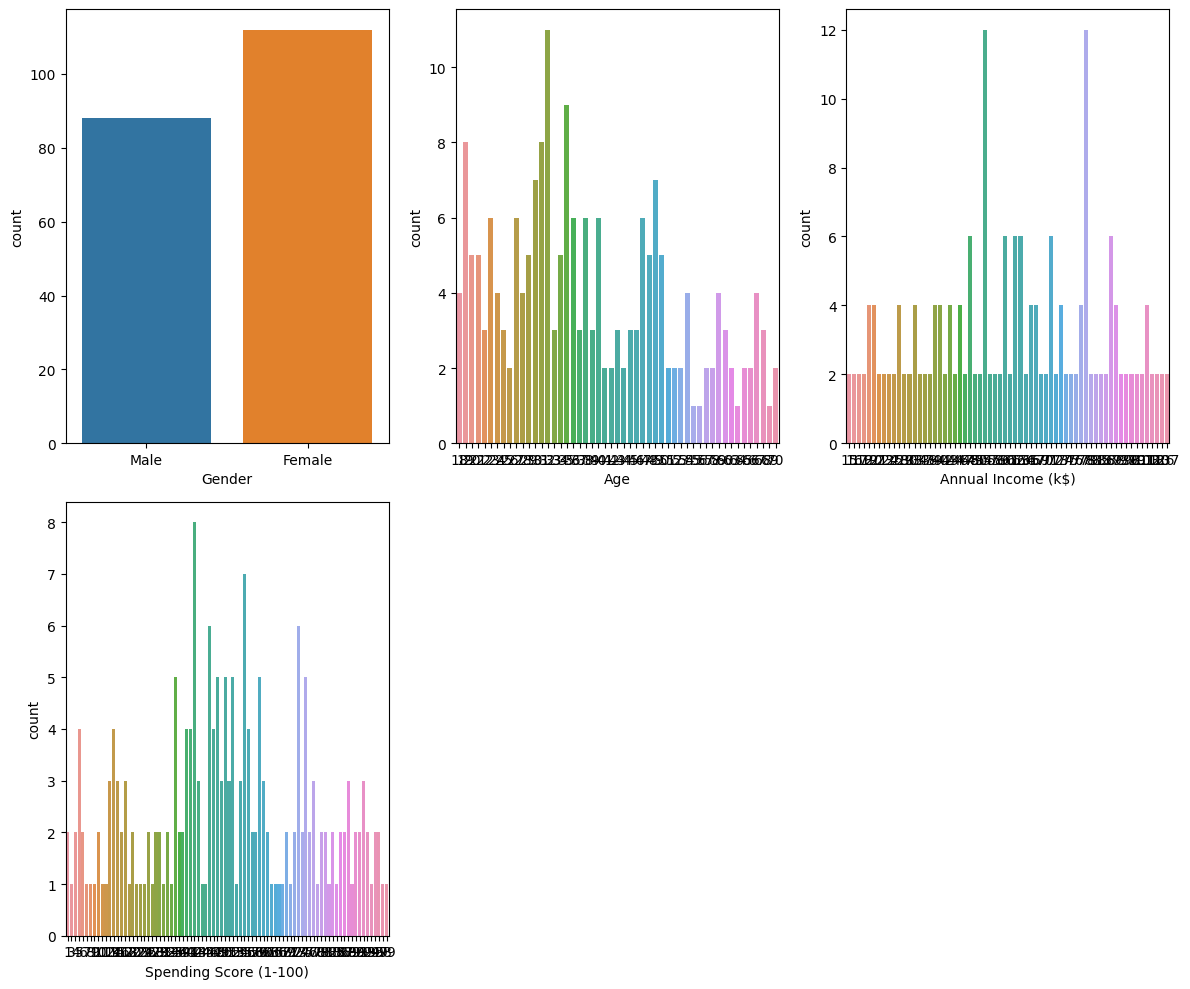

In [18]:
plt.figure(figsize=(12,10))
col = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
c = 1
for i in col:
    if c < 7:
        plt.subplot(2,3,c)
        sns.countplot(x = i,data =df)
        plt.xlabel(i)
    c += 1
    plt.tight_layout()

<Figure size 1200x1000 with 0 Axes>

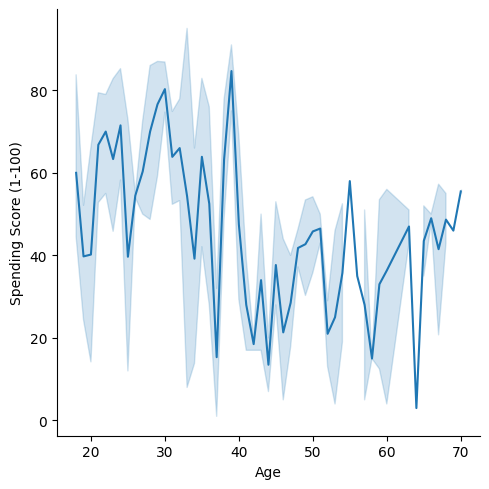

In [19]:
plt.figure(figsize=(12,10))
sns.relplot(x = 'Age',y = 'Spending Score (1-100)',data = df,kind = 'line')

# Предобработка данных

In [49]:
df['Gender'].value_counts() # Количество уникальных значений столбцов Gender

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True) #Удаляем ненужный столбец

# Ошибка- потому что столбец уже удалён

In [51]:
# Приводим значения столбца "Gender" к числовому формату
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [52]:
df['Age'] = df['Age'].astype(int) # Укажем что столбец Age имеет числовое значение

In [53]:
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}) 
# Переименуем столбцы для удобства

<Axes: >

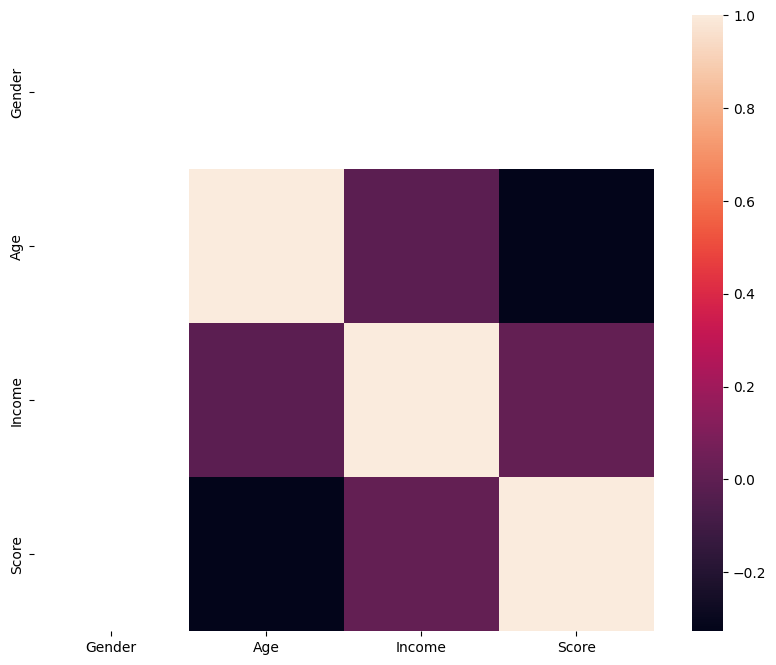

In [56]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

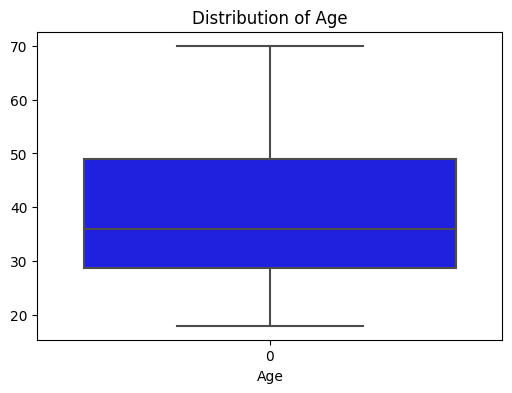

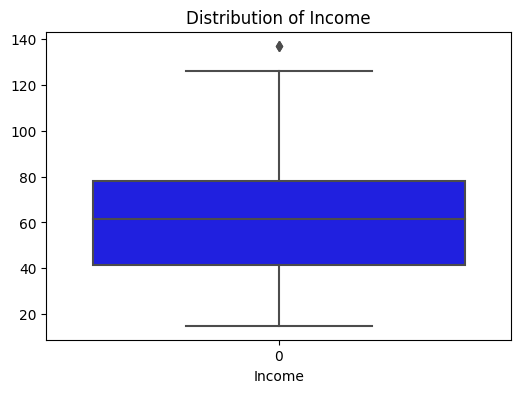

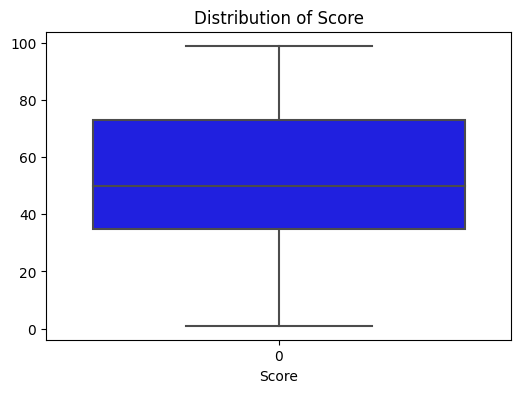

In [61]:
# Построение ящиков с усами для каждого количественного признака
for col in quant_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col], color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()


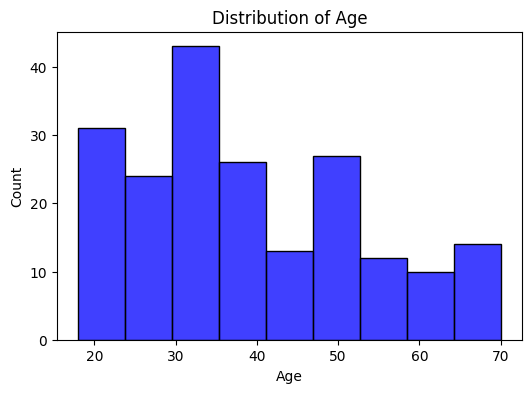

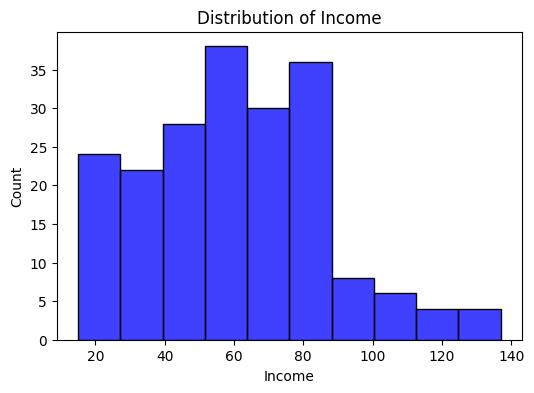

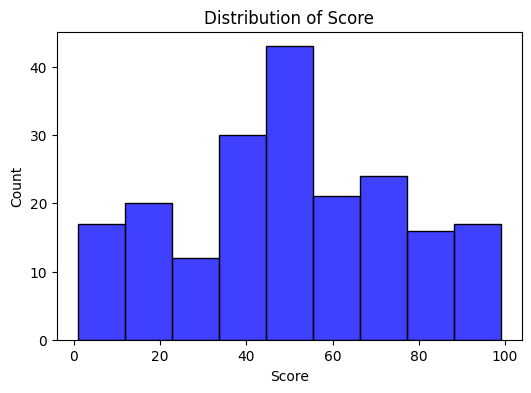

In [58]:
# Создаем список столбцов с количественными данными
quant_cols = ['Age', 'Income', 'Score']

# Построение гистограмм для каждого количественного признака
for col in quant_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=False, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


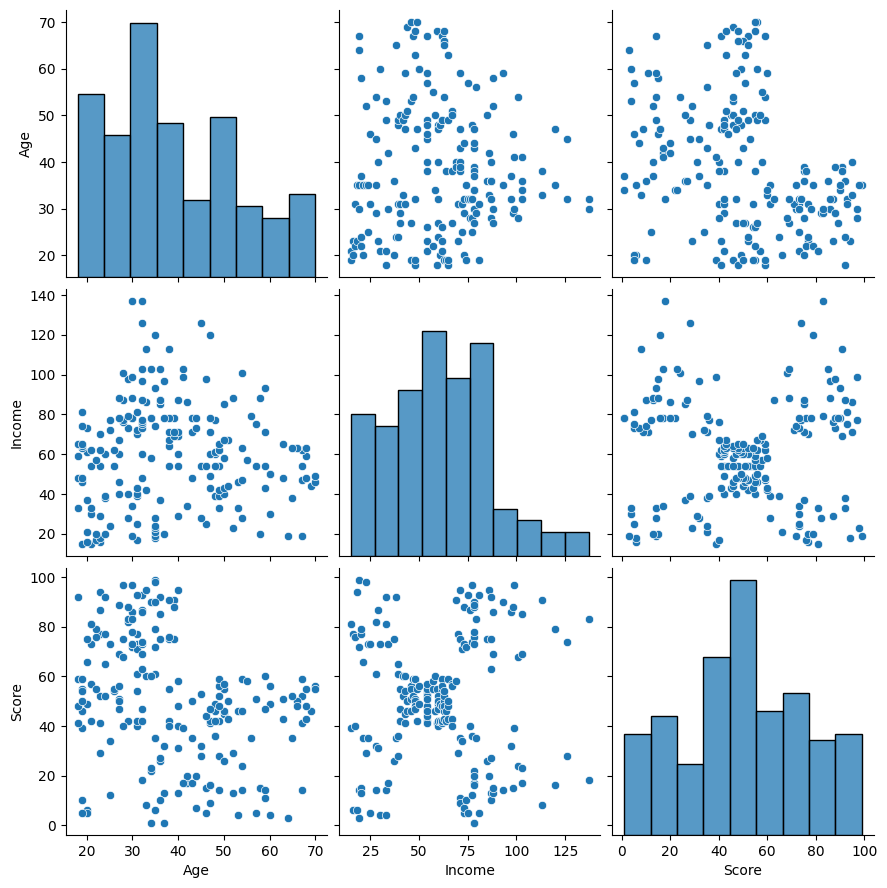

In [62]:
# Построение точечных графиков для каждой пары количественных признаков
sns.pairplot(df[quant_cols], height=3)
plt.show()


In [ ]:
# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [105]:
# Разделим данные на обучающую и тестовую выборки
#X = df['Gender']
#y = df['Score']

# определяем независимые переменные
X = df.drop("Gender", axis=1)
# определяем зависимую переменную
y = df["Gender"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Моделирование

Для моделирования преобразую одномерный массив в двумерный

In [74]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
x_2d = x.reshape(-1, 1)

In [106]:
# определяем независимые переменные
X = df.drop("Gender", axis=1)
# определяем зависимую переменную
y = df["Gender"]

# Random Forest

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Cluster'], test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


# Linear Regression

In [108]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)

1.0

# Logistic Regression

In [109]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#проверка точности
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

confusion matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 11]]
accuracy score =  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVC

In [110]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [111]:
y_pred = classifier.predict(X_test)

In [112]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[ 1  0  1  0  0]
 [ 0  5  0  0  0]
 [ 0  0 13  0  0]
 [ 0  1  0  7  1]
 [ 0  0  1  0 10]]


In [113]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9


# KNeighbors

In [114]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[ 0  0  2  0  0]
 [ 0  5  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  9  0]
 [ 0  1  1  0  9]]
accuracy score =  0.9


# GaussianNB

In [115]:
nb = GaussianNB()
nb.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#проверка точности
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 11]]
accuracy score =  1.0


# Decision Tree

In [116]:
#Древо решений

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#проверка точности
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 11]]
accuracy score =  1.0


# Сравнение моделей

In [120]:
df = pd.DataFrame({'models' : ['Logistic Regression','Linear Regression','svm','knna','Naive Bayes','Decision Tree'], 'Accuracy Score':['1.00','1.0','1.0','0.9','0.9','1.0']})

In [121]:
df.sort_values(by = 'Accuracy Score', ascending = False)

,models,Accuracy Score
0,Logistic Regression,1.00
1,Linear Regression,1.0
2,svm,1.0
5,Decision Tree,1.0
3,knna,0.9
4,Naive Bayes,0.9


# Оценка качества модели с помощью метрик


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [140]:
from sklearn.metrics import classification_report

In [ ]:
# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)


In [142]:
# Оценка качества модели с помощью метрик
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

In [143]:
# Вывод результатов
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1:', f1)
print('Classification Report:\n', report)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

